# Q1 (SalaryData)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics

In [2]:
sdtest=pd.read_csv("SalaryData_Test(1).csv")
sdtest

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
sdtrain=pd.read_csv("SalaryData_Train(1).csv")
sdtrain

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
sdtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [5]:
sdtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
sdtest.shape

(15060, 14)

In [7]:
sdtrain.shape

(30161, 14)

In [8]:
# checking for null values

In [9]:
sdtest.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
sdtrain.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [11]:
# frequency for categorical fields 
category_col =['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary'] 
for c in category_col:
    print (c)
    print (sdtrain[c].value_counts())
    print('\n')

workclass
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64


education
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64


maritalstatus
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64


occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-cler

In [12]:
# Visualization of Train

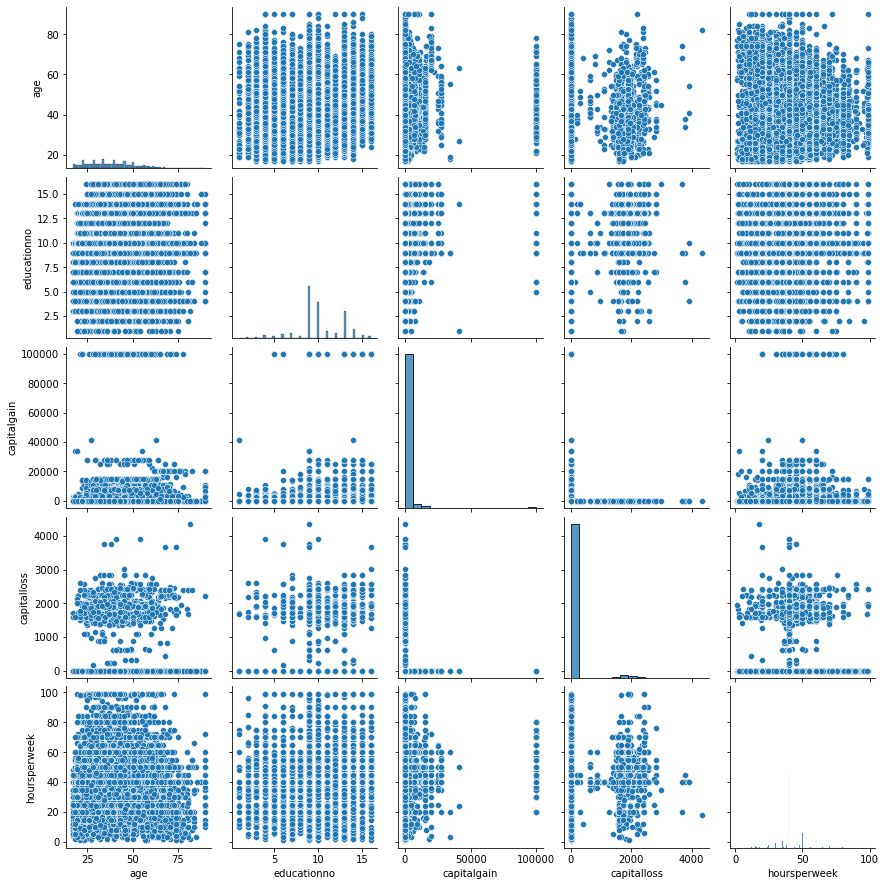

In [13]:
sns.pairplot(sdtrain)

In [14]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

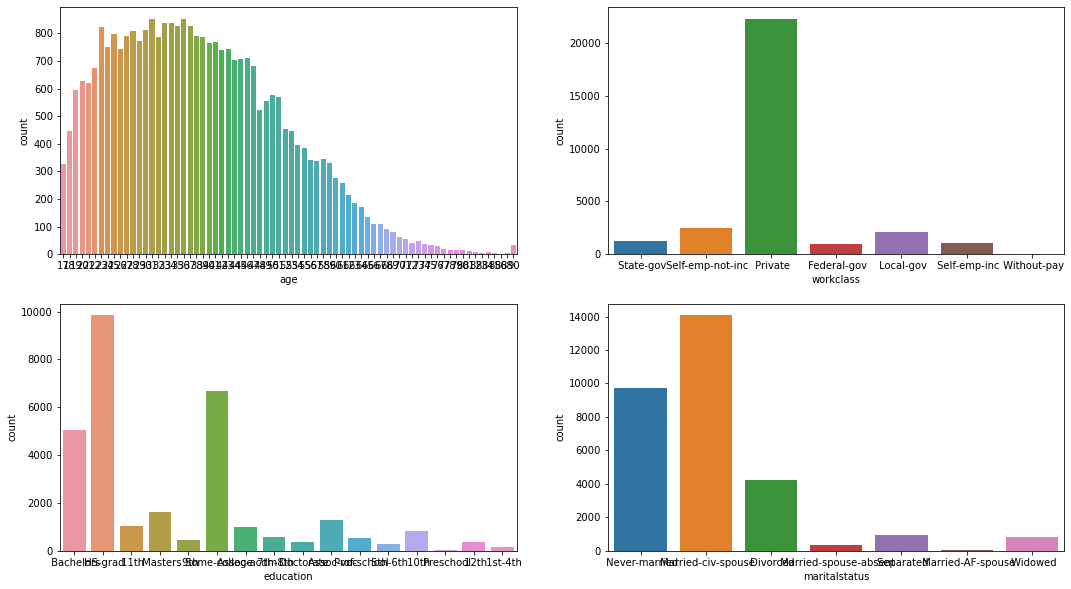

In [15]:
plt.figure(figsize=(18,10))
plt.subplot(221)
sns.countplot('age',data=sdtrain)
plt.subplot(222)
sns.countplot('workclass',data=sdtrain)
plt.subplot(223)
sns.countplot('education',data=sdtrain)
plt.subplot(224)
sns.countplot('maritalstatus',data=sdtrain)
plt.show()

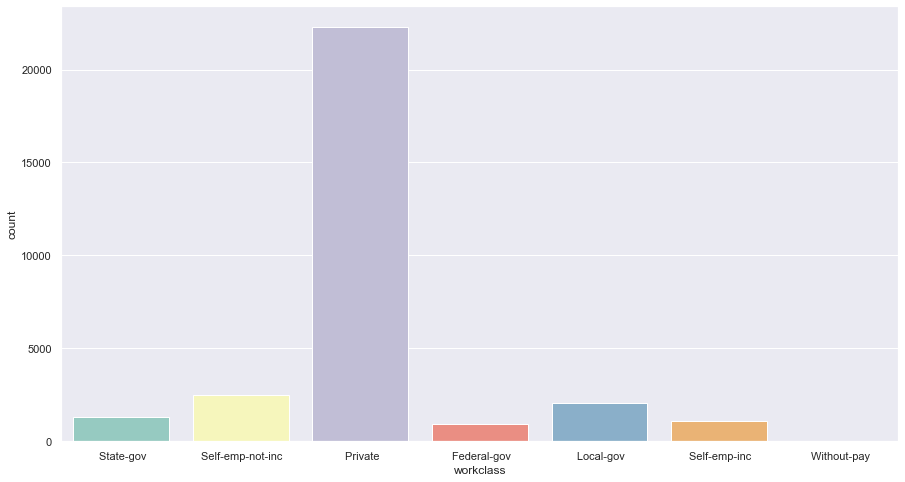

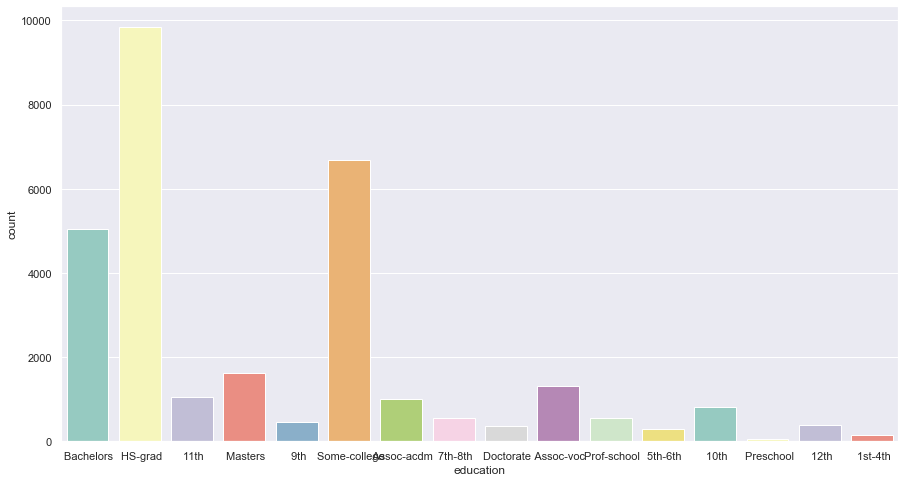

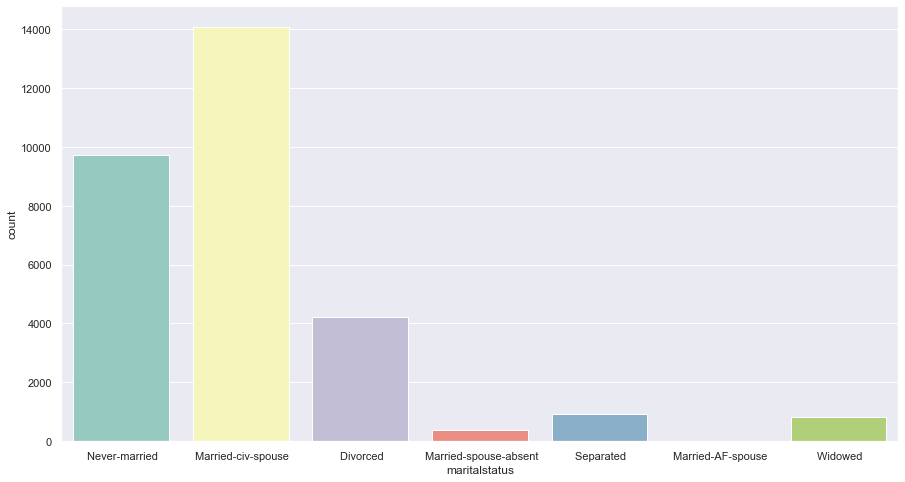

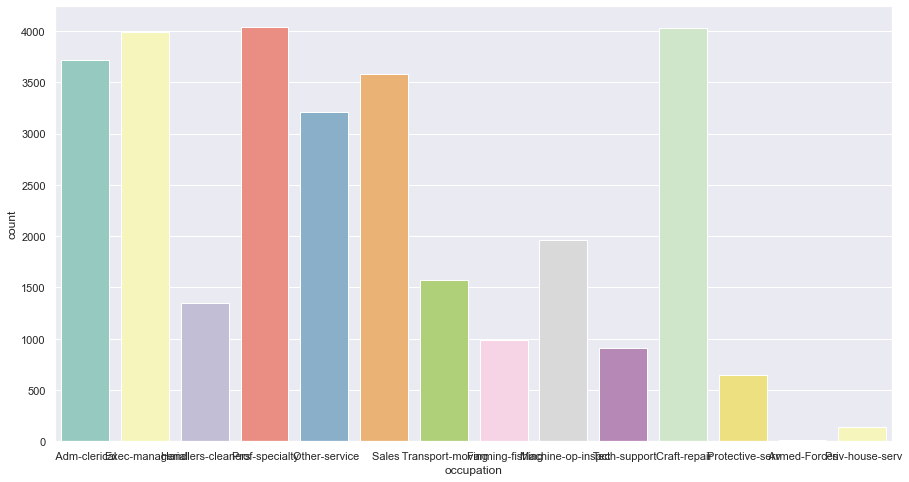

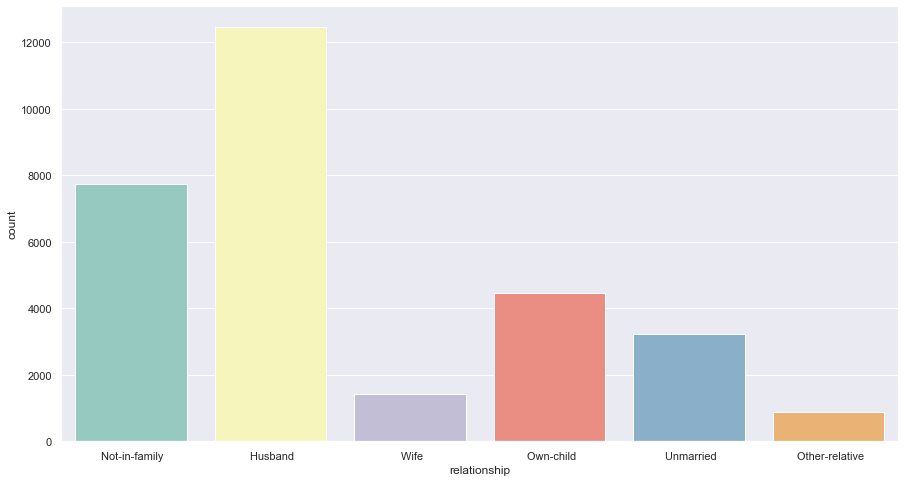

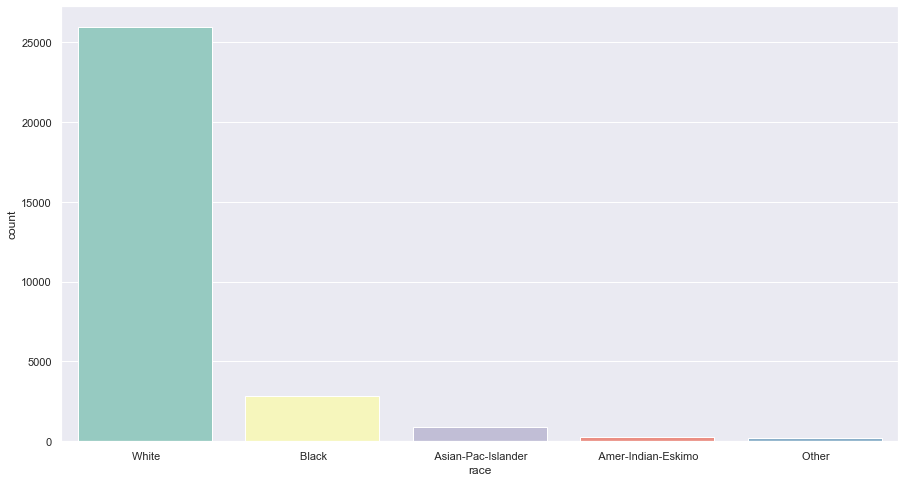

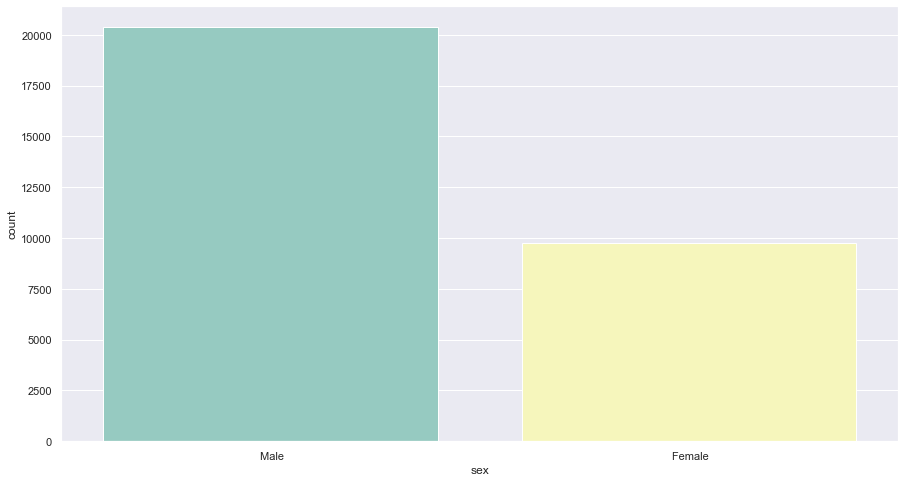

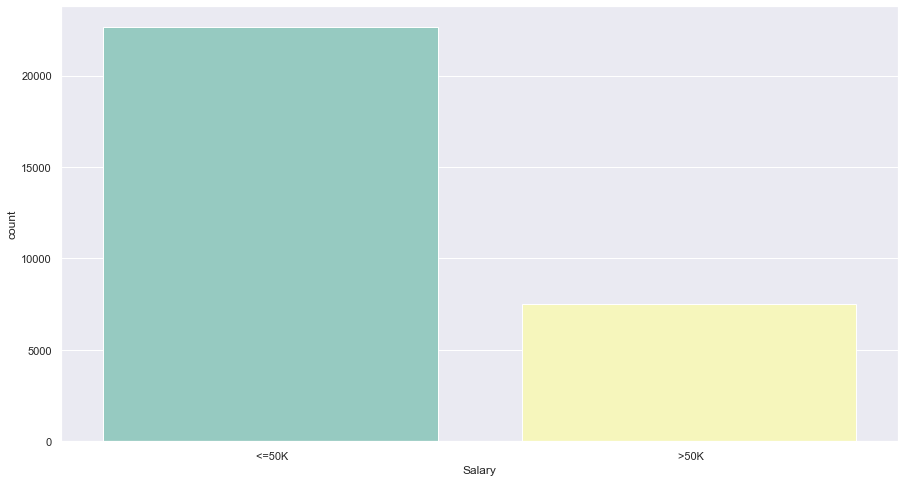

In [16]:
sns.set(rc={'figure.figsize':(15,8)})
cat_col=['workclass','education','maritalstatus','occupation','relationship','race','sex','Salary']
for col in cat_col:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(x=col,data=sdtrain,palette='Set3');

In [17]:
# Visualization of Test

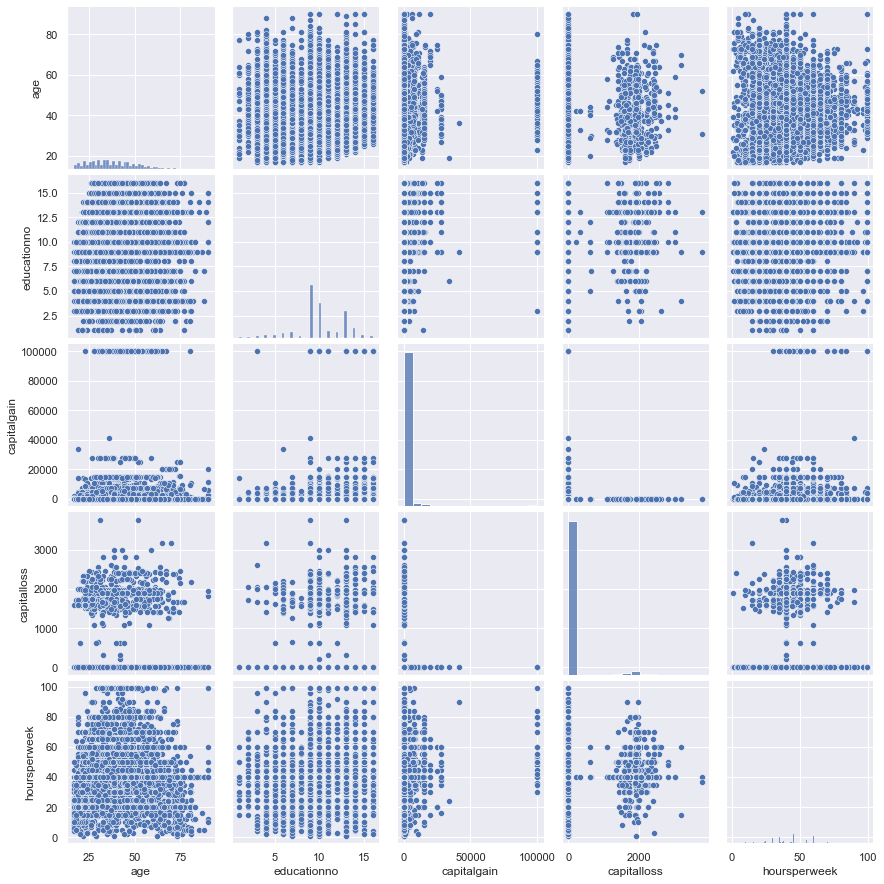

In [18]:
sns.pairplot(sdtest)

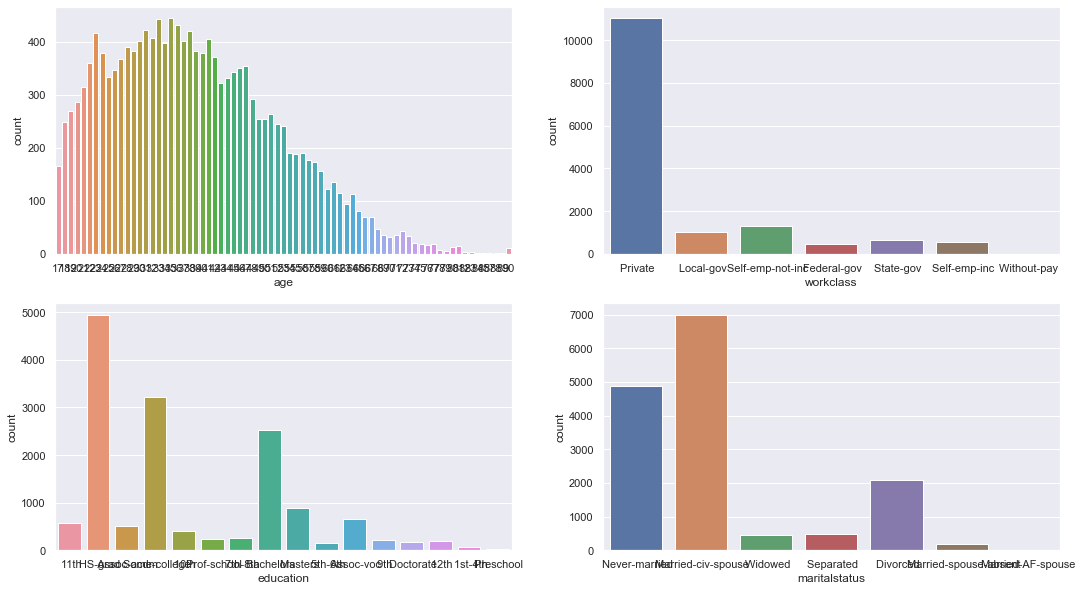

In [19]:
plt.figure(figsize=(18,10))
plt.subplot(221)
sns.countplot('age',data=sdtest)
plt.subplot(222)
sns.countplot('workclass',data=sdtest)
plt.subplot(223)
sns.countplot('education',data=sdtest)
plt.subplot(224)
sns.countplot('maritalstatus',data=sdtest)
plt.show()

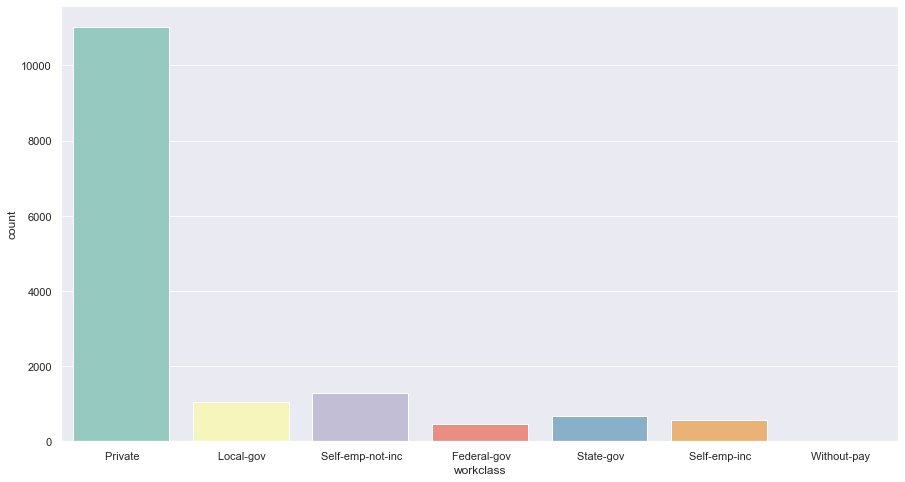

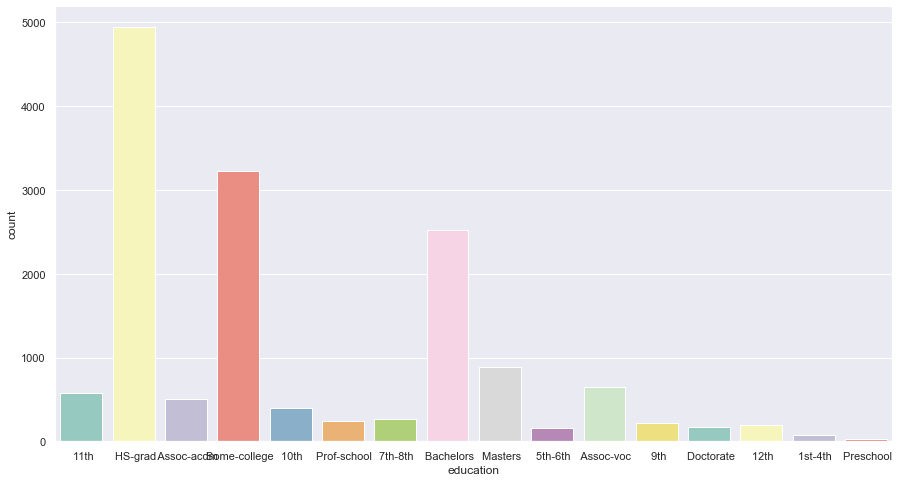

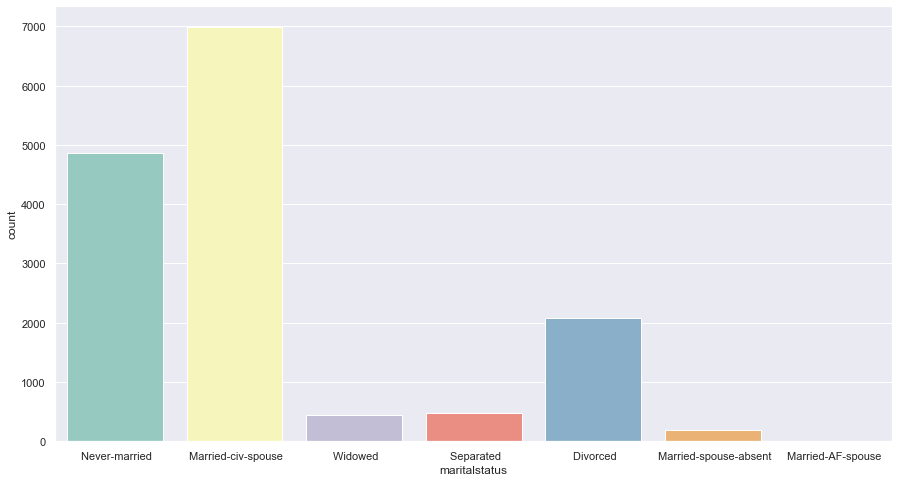

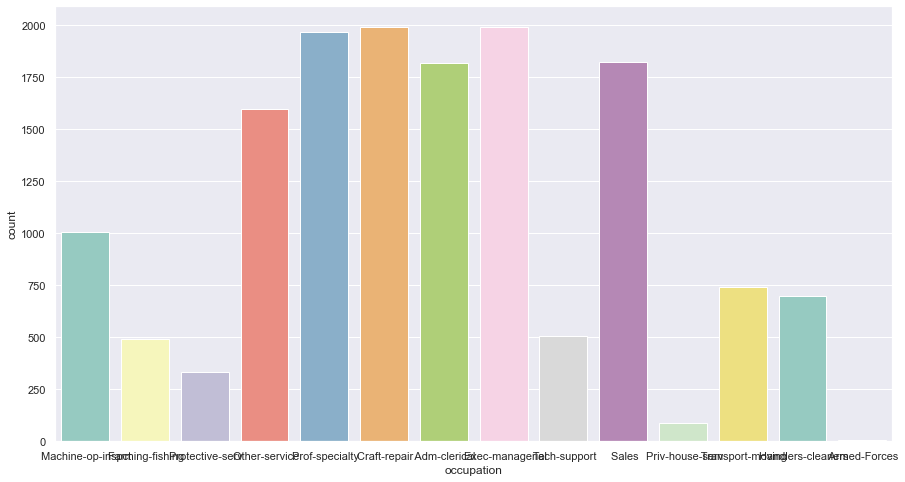

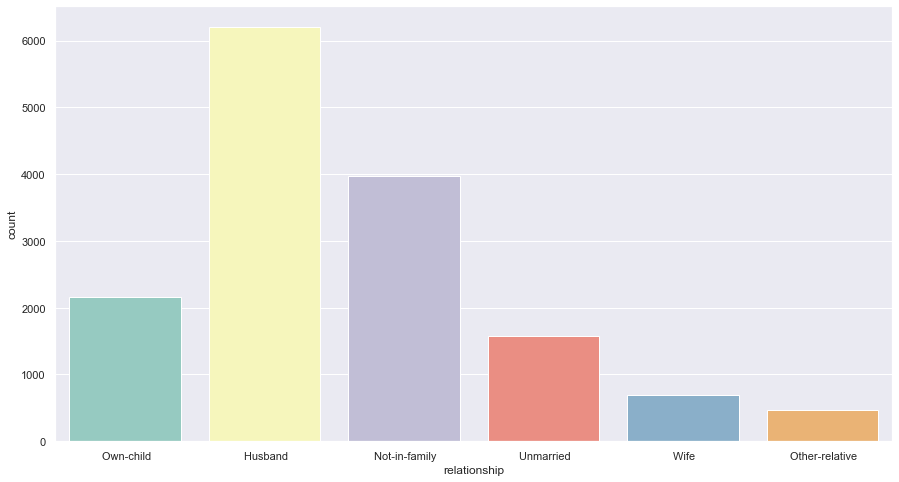

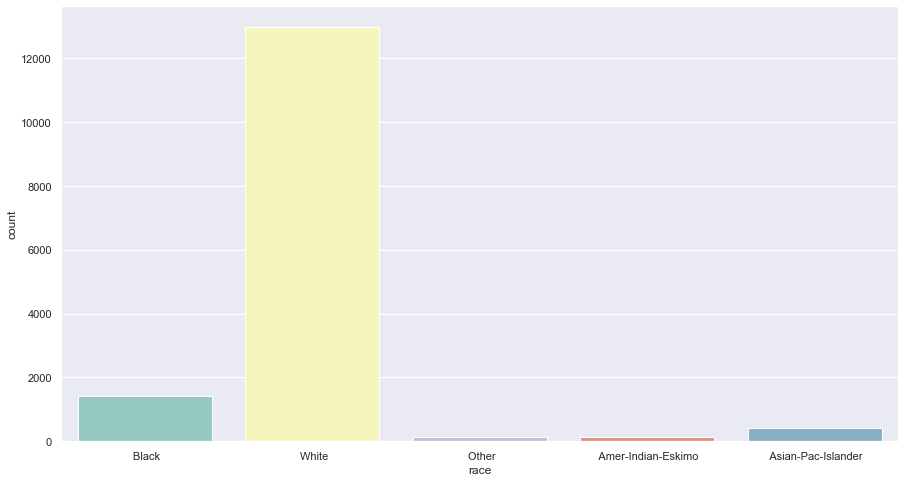

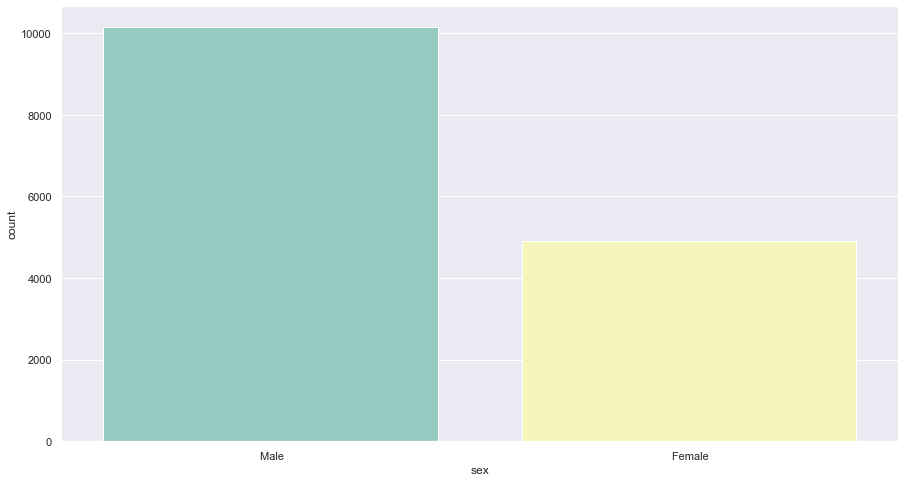

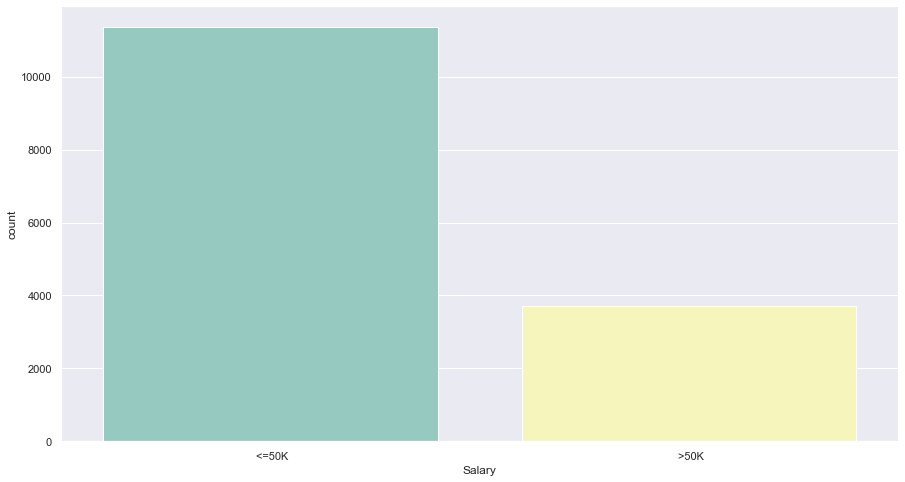

In [20]:
sns.set(rc={'figure.figsize':(15,8)})
cat_col=['workclass','education','maritalstatus','occupation','relationship','race','sex','Salary']
for col in cat_col:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(x=col,data=sdtest,palette='Set3');

In [21]:
# printing unique values from each categoricla columns
print('workclass',sdtrain.workclass.unique())
print('education',sdtrain.education.unique())
print('maritalstatus',sdtrain['maritalstatus'].unique())
print('occupation',sdtrain.occupation.unique())
print('relationship',sdtrain.relationship.unique())
print('race',sdtrain.race.unique())
print('sex',sdtrain.sex.unique())
print('native',sdtrain['native'].unique())
print('Salary',sdtrain.Salary.unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
maritalstatus [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras

In [22]:
sdtrain[['Salary','age']].groupby(['Salary'],as_index=False).mean().sort_values(by='age',ascending=False)

,Salary,age
1,>50K,43.959110
0,<=50K,36.608264


In [23]:
# Feature encoding

In [24]:
sdtrain=sdtrain.apply(LabelEncoder().fit_transform)
sdtrain.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [25]:
sdtest=sdtest.apply(LabelEncoder().fit_transform)
sdtest.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [26]:
# Test-Train-Split
drop_elements=['education','native','Salary']
X=sdtrain.drop(drop_elements,axis=1)
X

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
0,22,5,12,4,0,1,4,1,24,0,39
1,33,4,12,2,3,0,4,1,0,0,12
2,21,2,8,0,5,1,4,1,0,0,39
3,36,2,6,2,5,0,2,1,0,0,39
4,11,2,12,2,9,5,2,0,0,0,39
...,...,...,...,...,...,...,...,...,...,...,...
30156,10,2,11,2,12,5,4,0,0,0,37
30157,23,2,8,2,6,0,4,1,0,0,39
30158,41,2,8,6,0,4,4,0,0,0,39
30159,5,2,8,4,0,3,4,1,0,0,19


In [27]:
y=sdtrain['Salary']
y

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

**Building SVM Model**

In [29]:
#svc.fit(X_train,y_train)
svc=SVC()

In [30]:
svc.fit(X_train,y_train)

SVC()

In [31]:
prediction=svc.predict(X_test)

In [32]:
print(metrics.classification_report(y_test,prediction))
print(metrics.confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      7466
           1       0.86      0.28      0.42      2488

    accuracy                           0.81      9954
   macro avg       0.83      0.63      0.65      9954
weighted avg       0.82      0.81      0.77      9954

[[7355  111]
 [1789  699]]


In [33]:
print("Accuracy:",metrics.accuracy_score(y_test,prediction))
print("Precision:",metrics.precision_score(y_test,prediction))
print("Recall:",metrics.recall_score(y_test,prediction))

Accuracy: 0.8091219610206952
Precision: 0.8629629629629629
Recall: 0.2809485530546624


**Testing it on new test data from SalaryData_Test(1)**

In [34]:
drop_elements=['education','native','Salary']
X_new=sdtest.drop(drop_elements,axis=1)
X

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
0,22,5,12,4,0,1,4,1,24,0,39
1,33,4,12,2,3,0,4,1,0,0,12
2,21,2,8,0,5,1,4,1,0,0,39
3,36,2,6,2,5,0,2,1,0,0,39
4,11,2,12,2,9,5,2,0,0,0,39
...,...,...,...,...,...,...,...,...,...,...,...
30156,10,2,11,2,12,5,4,0,0,0,37
30157,23,2,8,2,6,0,4,1,0,0,39
30158,41,2,8,6,0,4,4,0,0,0,39
30159,5,2,8,4,0,3,4,1,0,0,19


In [35]:
y_new=sdtest['Salary']
y

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [36]:
# make predictions
new_prediction=svc.predict(X_new)

# summarize the fit of the model
print(metrics.classification_report(y_new,new_prediction))
print(metrics.confusion_matrix(y_new,new_prediction))

print("Accuracy:",metrics.accuracy_score(y_new,new_prediction))
print("Precision:",metrics.precision_score(y_new,new_prediction))
print("Recall:",metrics.recall_score(y_new,new_prediction))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     11360
           1       0.87      0.26      0.40      3700

    accuracy                           0.81     15060
   macro avg       0.84      0.63      0.65     15060
weighted avg       0.82      0.81      0.77     15060

[[11216   144]
 [ 2727   973]]
Accuracy: 0.8093625498007968
Precision: 0.8710832587287377
Recall: 0.26297297297297295


**Building SVM model with Hyper Parameters kernel='rbf',gamma=15,C=1**

In [37]:
model=SVC(kernel='rbf',gamma=15,C=1)

In [38]:
model.fit(X_train,y_train)

SVC(C=1, gamma=15)

In [39]:
print(metrics.classification_report(y_test,prediction))
print(metrics.confusion_matrix(y_test,prediction))

print("Accuracy:",metrics.accuracy_score(y_test,prediction))
print("Precision:",metrics.precision_score(y_test,prediction))
print("Recall:",metrics.recall_score(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      7466
           1       0.86      0.28      0.42      2488

    accuracy                           0.81      9954
   macro avg       0.83      0.63      0.65      9954
weighted avg       0.82      0.81      0.77      9954

[[7355  111]
 [1789  699]]
Accuracy: 0.8091219610206952
Precision: 0.8629629629629629
Recall: 0.2809485530546624


In [40]:
#Testing above model on SalaryData_Test(1).csv

In [41]:
new_prediction=model.predict(X_new)

In [42]:
print(metrics.classification_report(y_new,new_prediction))
print(metrics.confusion_matrix(y_new,new_prediction))

print("Accuracy:",metrics.accuracy_score(y_new,new_prediction))
print("Precision:",metrics.precision_score(y_new,new_prediction))
print("Recall:",metrics.recall_score(y_new,new_prediction))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86     11360
           1       0.55      0.07      0.13      3700

    accuracy                           0.76     15060
   macro avg       0.66      0.53      0.49     15060
weighted avg       0.71      0.76      0.68     15060

[[11147   213]
 [ 3437   263]]
Accuracy: 0.7576361221779548
Precision: 0.5525210084033614
Recall: 0.07108108108108108
